In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 

In [3]:
df = pd.read_csv("../data/spam.csv", encoding="latin-1")  
df = df[['v1', 'v2']]  # Select relevant columns  
df.columns = ['label', 'message']  # Rename for clarity

In [4]:
print("Data Shape:", df.shape)  # Display the shape of the dataframe  
print("Data Info:")  
print(df.info())  # Get info on data types and non-null counts  
print("Descriptive Statistics:")  
print(df.describe())  # Summary statistics for numeric columns 

Data Shape: (5572, 2)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
Descriptive Statistics:
       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [5]:
print("Missing Values:")  
print(df.isnull().sum())  # Count missing values in each column

Missing Values:
label      0
message    0
dtype: int64


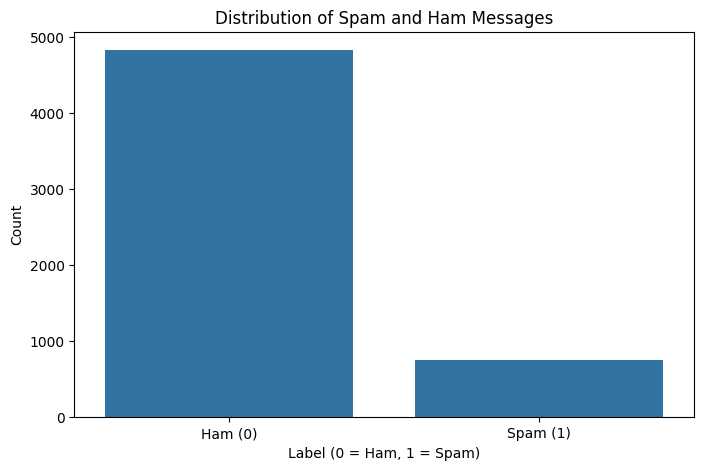

In [6]:
# Visualize the distribution of labels  
plt.figure(figsize=(8, 5))  
sns.countplot(x='label', data=df)  
plt.title('Distribution of Spam and Ham Messages')  
plt.xlabel('Label (0 = Ham, 1 = Spam)')  
plt.ylabel('Count')  
plt.xticks([0, 1], ['Ham (0)', 'Spam (1)'])  # More descriptive x-ticks  
plt.show() 

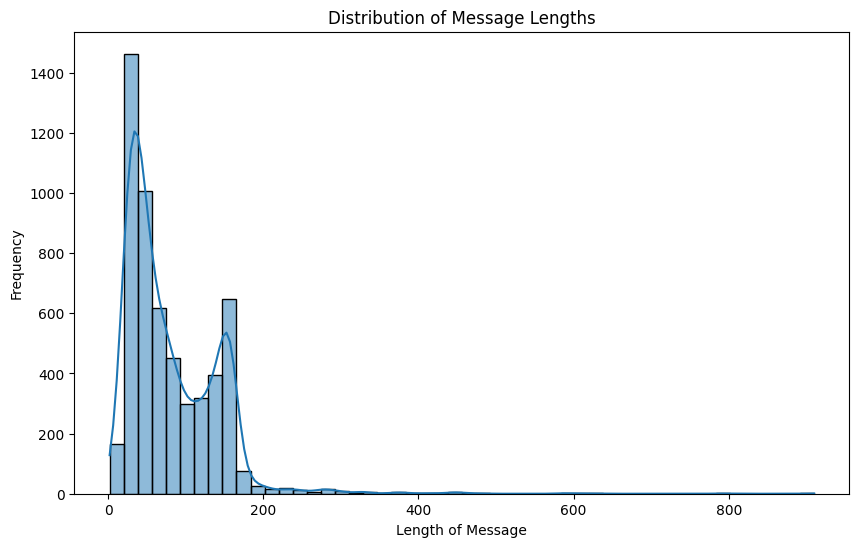

In [7]:
df['message_length'] = df['message'].apply(len)  

# Visualize the distribution of message lengths  
plt.figure(figsize=(10, 6))  
sns.histplot(df['message_length'], bins=50, kde=True)  
plt.title('Distribution of Message Lengths')  
plt.xlabel('Length of Message')  
plt.ylabel('Frequency')  
plt.show() 

In [8]:
# Check for outliers in message lengths  
length_stats = df['message_length'].describe()  
print("Message Length Statistics:")  
print(length_stats)  


Message Length Statistics:
count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: message_length, dtype: float64


In [9]:
# Define thresholds for outlier detection  
lower_threshold = length_stats['25%'] - 1.5 * (length_stats['75%'] - length_stats['25%'])  
upper_threshold = length_stats['75%'] + 1.5 * (length_stats['75%'] - length_stats['25%'])

In [10]:
# Identify outliers  
outliers = df[(df['message_length'] < lower_threshold) | (df['message_length'] > upper_threshold)]  
print(f"Identified {outliers.shape[0]} outliers based on message length.")  

Identified 68 outliers based on message length.


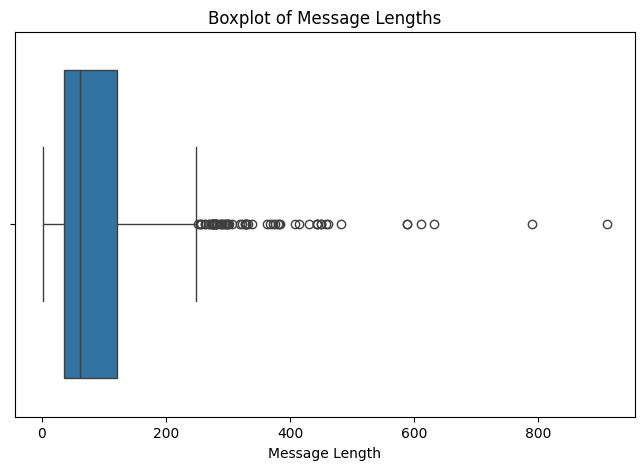

In [11]:

# Visualize outliers  
plt.figure(figsize=(8, 5))  
sns.boxplot(x='message_length', data=df)  
plt.title('Boxplot of Message Lengths')  
plt.xlabel('Message Length')  
plt.show()  

In [12]:
# Get a sample of messages to analyze content  
sample_messages = df.sample(10)  # Randomly sample 10 messages  
print("Sample Messages:")  
print(sample_messages) 

Sample Messages:
     label                                            message  message_length
5154   ham                    Like  &lt;#&gt; , same question              31
4419   ham                    Ok i msg u b4 i leave my house.              31
5452   ham           What???? Hello wats talks email address?              40
3736   ham  Plz note: if anyone calling from a mobile Co. ...             263
3254   ham          HI ITS KATE CAN U GIVE ME A RING ASAP XXX              41
3164   ham  Cheers for the card ... Is it that time of yea...              56
5131   ham  That sucks. I'll go over so u can do my hair. ...              70
4111   ham                          I'll see, but prolly yeah              25
4968   ham  I will cme i want to go to hos 2morow. After t...             125
199    ham           Found it, ENC  &lt;#&gt; , where you at?              40


In [13]:
# Check for potential duplicate messages  
duplicates = df[df.duplicated(subset=['message'], keep=False)]  
print(f"Number of duplicate messages: {duplicates.shape[0]}") 

Number of duplicate messages: 684


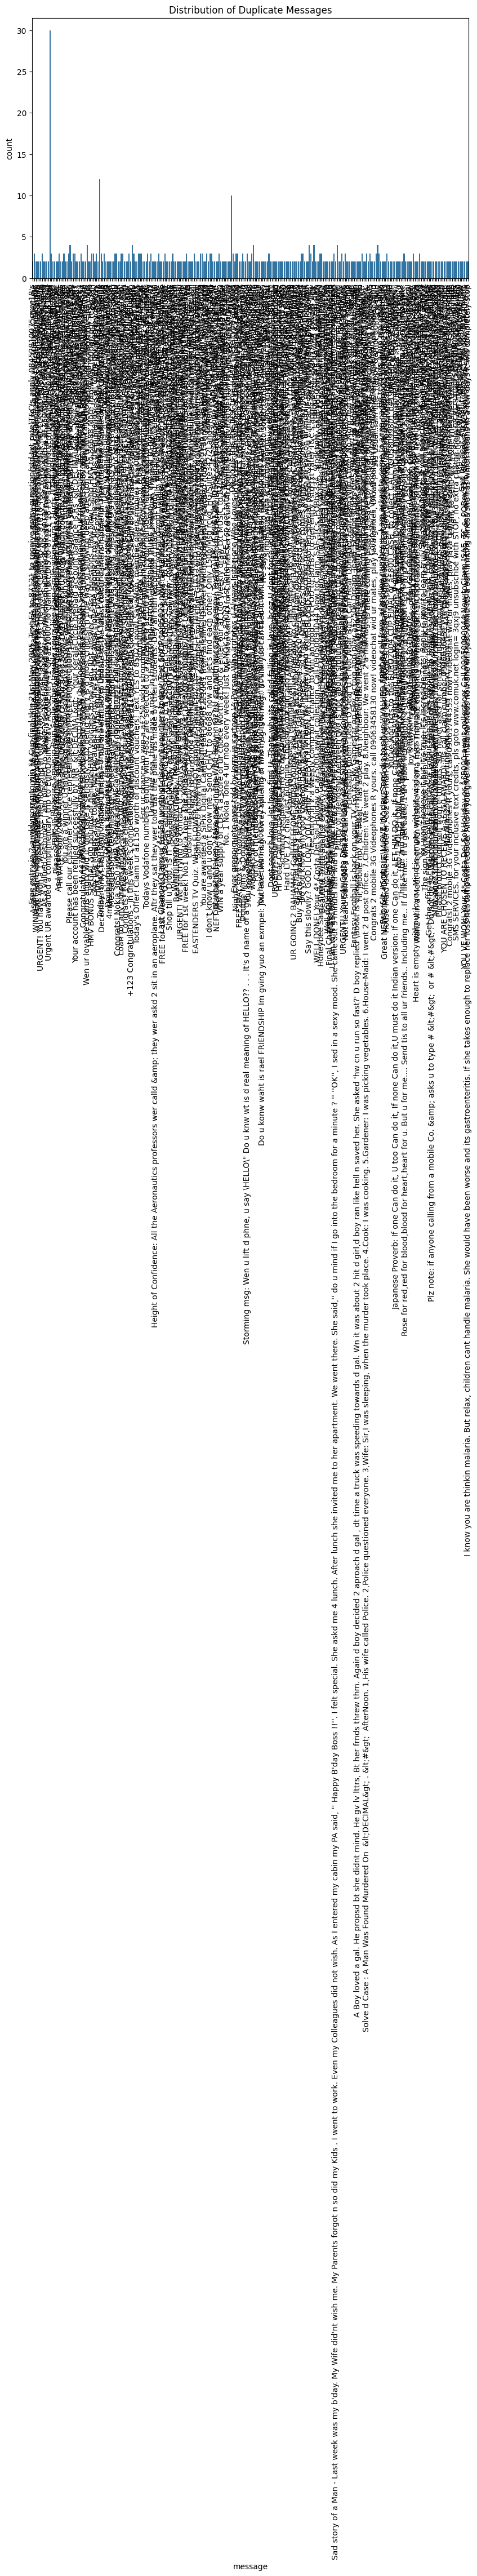

In [14]:
# Visualize duplicate messages if any  
if not duplicates.empty:  
    plt.figure(figsize=(10, 6))  
    sns.countplot(x='message', data=duplicates)  
    plt.title('Distribution of Duplicate Messages')  
    plt.xticks(rotation=90)  
    plt.show() 

In [15]:
  
# Count the number of occurrences of specific keywords in the spam messages  
spam_keywords = ['free', 'call', 'win', 'money', 'offer'] 

In [16]:
keyword_counts = {word: df['message'].str.contains(word, case=False).sum() for word in spam_keywords}  
print("Keyword Counts in Messages:")  
for keyword, count in keyword_counts.items():  
    print(f"{keyword}: {count}") 

Keyword Counts in Messages:
free: 265
call: 635
win: 166
money: 56
offer: 46


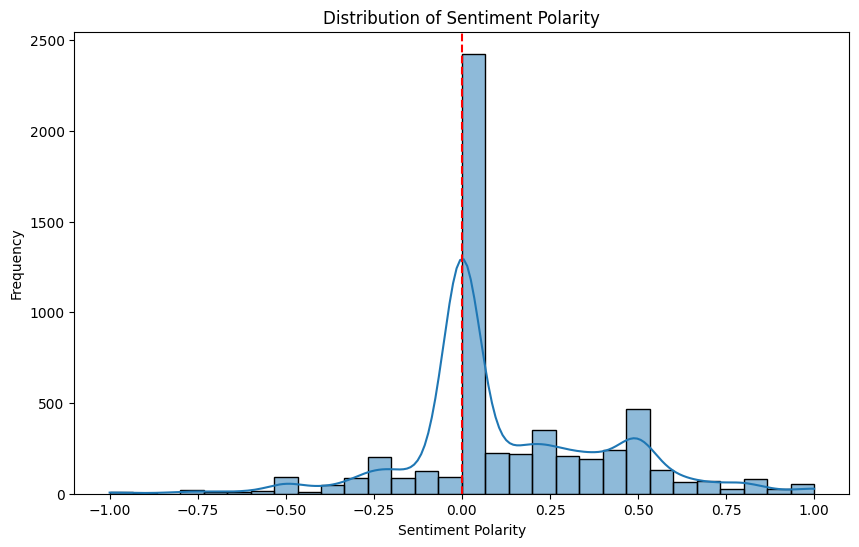

In [21]:
from textblob import TextBlob  

# Function to get sentiment polarity  
def get_sentiment(text):  
    return TextBlob(text).sentiment.polarity  

# Apply sentiment analysis  
df['sentiment'] = df['message'].apply(get_sentiment)  
plt.figure(figsize=(10, 6))  
sns.histplot(df['sentiment'], bins=30, kde=True)  
plt.title('Distribution of Sentiment Polarity')  
plt.xlabel('Sentiment Polarity')  
plt.ylabel('Frequency')  
plt.axvline(0, color='red', linestyle='--')  # Neutral sentiment line  
plt.show() 